In [67]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline
from quippy.potential import Potential
from quippy.descriptors import Descriptor
import pymatgen.ext.matproj as mp
import pymatgen.core.periodic_table as pt
import pymatgen.io.ase as pase
import matplotlib.pyplot as plt
import numpy as np
import os
from ase.io.castep import read_castep_castep
from ase.io.castep import write_castep_cell
from ase.io.lammpsdata import write_lammps_data
from ase.atoms import Atoms
from ase.io.extxyz import read_xyz, write_xyz
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import vectorize

In [48]:
from matplotlib import rc

In [128]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['legend.borderaxespad'] = 1.5

plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.0

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.0

In [166]:
os.chdir('/home/joe/Documents/MoS/infographic')

In [7]:
with mp.MPRester("v0JVgKLlpTXKEhiKeDIC") as m:
    results = m.query(criteria={"elements":['Mo','S']},
                            properties=["exp.tags", "icsd_ids", "spacegroup",
                                        "task_id", "density", "final_structure",
                                        "e_above_hull", "energy", "energy_per_atom"])

In [36]:
print('{:15s} {:10s} {:>10s} {:>10s} {:>5s}\n{}\n'.format('MP ID', 'Spacegroup', 'Density', 'E/at', 'N', '-'*54))

for i, val in enumerate(results):
    print('{:15s} {:10s} {:10.2f} {:>10.2f} {:5d}'.format(val['task_id'], val['spacegroup']['symbol'],
                                                        val['density'], val['energy_per_atom'], i))

MP ID           Spacegroup    Density       E/at     N
------------------------------------------------------

mvc-11780       F-43m            4.81      -6.97     0
mp-31257        P6_3/m           4.73      -7.74     1
mp-1104577      P-1              6.03      -7.64     2
mp-1210708      I4/m             8.75      -9.08     3
mp-1434         R3m              4.24      -7.24     4
mp-1239169      P2_1/m           3.05      -6.03     5
mp-673645       P1               5.69      -7.83     6
mp-1018809      P6_3/mmc         4.31      -7.24     7
mp-990083       Pmmn             2.67      -7.07     8
mp-1211453      Cmmm             0.13      -3.89     9
mp-1239203      Pm               3.72      -5.74    10
mp-1027525      P-3m1            3.03      -7.24    11
mp-1023924      P-6m2            1.73      -7.24    12
mp-2164         R-3              5.05      -7.69    13
mp-1025874      P-6m2            2.80      -7.24    14
mp-558544       R-3m             4.77      -6.96    15
mvc-7052 

In [46]:
desc_MoS = Descriptor(
                        'soap average=F l_max=6 n_max=12 atom_sigma=0.5 \
                              cutoff=5.0 cutoff_transition_width=1.0 \
                              central_weight=1.0 n_species=2 Z=42 species_Z={42 16}')
desc_SMo = Descriptor(
                        'soap average=F l_max=6 n_max=12 atom_sigma=0.5 \
                              cutoff=5.0 cutoff_transition_width=1.0 \
                              central_weight=1.0 n_species=2 Z=16 species_Z={16 42}')

In [69]:
xtal_atoms = []
for i, val in enumerate(results):
    xtal_atoms.append(pase.AseAtomsAdaptor().get_atoms(val['final_structure']))
    xtal_atoms[-1].info['energy'] = val['energy']
    xtal_atoms[-1].info['mpID'] = val['task_id']
    td_MS = desc_MoS.calc_descriptor(xtal_atoms[-1])
    td_SM = desc_SMo.calc_descriptor(xtal_atoms[-1])
    xtal_atoms[-1].info['SOAP_MoS'] = td_MS
    xtal_atoms[-1].info['SOAP_SMo'] = td_SM
        #np.concatenate([td_MS, td_SM], axis=0)

In [70]:
ref_MoS = xtal_atoms[3].info['SOAP_MoS'][0]
ref_SMo = xtal_atoms[3].info['SOAP_SMo'][0]
gs_sim_MS = [2 - 2*np.dot(ref_MoS, i.info['SOAP_MoS'].T) for i in xtal_atoms]
gs_sim_SM = [2 - 2*np.dot(ref_SMo, i.info['SOAP_SMo'].T) for i in xtal_atoms]

In [71]:
for i, val in enumerate(xtal_atoms):
    val.arrays['MoS_sim'] = np.concatenate([gs_sim_MS[i], gs_sim_SM[i]], axis=0)

In [38]:
#Z={42 16}

{'exp.tags': ['Molybdenum sulfide (15/19)'],
 'icsd_ids': [413406, 644260],
 'spacegroup': {'symprec': 0.1,
  'source': 'spglib',
  'symbol': 'P6_3/m',
  'number': 176,
  'point_group': '6/m',
  'crystal_system': 'hexagonal',
  'hall': '-P 6c'},
 'task_id': 'mp-31257',
 'density': 4.7343166895739905,
 'final_structure': Structure Summary
 Lattice
     abc : 9.294906240938314 9.294906240938314 19.204461
  angles : 90.0 90.0 120.00000171495549
  volume : 1436.8875223216953
       A : 4.647453 -8.049625 0.0
       B : 4.647453 8.049625 0.0
       C : 0.0 0.0 19.204461
 PeriodicSite: Mo (5.5226, -3.9854, 4.8011) [0.8417, 0.3466, 0.2500]
 PeriodicSite: Mo (6.2127, 2.7900, 14.4033) [0.4951, 0.8417, 0.7500]
 PeriodicSite: Mo (3.9573, 1.2743, 14.4033) [0.3466, 0.5049, 0.7500]
 PeriodicSite: Mo (5.3376, -1.2743, 4.8011) [0.6534, 0.4951, 0.2500]
 PeriodicSite: Mo (3.0822, -2.7900, 4.8011) [0.5049, 0.1583, 0.2500]
 PeriodicSite: Mo (3.7723, 3.9854, 14.4033) [0.1583, 0.6534, 0.7500]
 PeriodicSite:

In [74]:
for i, val in enumerate(xtal_atoms):
    with open('MoS_mpDB/{}.xyz'.format(val.info['mpID']), 'w') as f:
        write_xyz(f, val)

In [73]:
with open('MoS_mpDB/MP_collective.xyz', 'w') as f:
    for i, val in enumerate(xtal_atoms):
        write_xyz(f, val, append=True)


In [60]:
[len(xtal_atoms), len(i.arrays['SOAP_MoS'])

array([0.73068166, 0.73068166, 0.73068357, 0.73068166, 0.71093684,
       0.71093684, 0.71093707, 0.7339815 , 0.73398262, 0.73398262,
       0.73398262, 0.71093684])

In [ ]:
def kernel_compare(cfgs, comp,
                   desc=Descriptor('soap average=T l_max=6 n_max=12 \
                                   atom_sigma=0.5 cutoff=5.0 \
                                   cutoff_transition_width=1.0 central_weight=1.0'),
                   zeta=4):
    '''calculates the average/std dev similarity kernel between a set of
    configs and a reference.
    '''
    descs = np.array(desc.calc_descriptor(cfgs))
    descs = descs.reshape(descs.shape[0::2])
    comp_desc = desc.calc_descriptor(comp)[0]
    # norm = np.einsum('ik,ik->i', descs, descs)
    # norm_comp = np.dot(comp_desc, comp_desc)
    k = np.array(2 - 2*np.einsum('ij,j', descs, comp_desc)**zeta)


In [76]:
mpl.cm.plasma.colors

[[0.050383, 0.029803, 0.527975],
 [0.063536, 0.028426, 0.533124],
 [0.075353, 0.027206, 0.538007],
 [0.086222, 0.026125, 0.542658],
 [0.096379, 0.025165, 0.547103],
 [0.10598, 0.024309, 0.551368],
 [0.115124, 0.023556, 0.555468],
 [0.123903, 0.022878, 0.559423],
 [0.132381, 0.022258, 0.56325],
 [0.140603, 0.021687, 0.566959],
 [0.148607, 0.021154, 0.570562],
 [0.156421, 0.020651, 0.574065],
 [0.16407, 0.020171, 0.577478],
 [0.171574, 0.019706, 0.580806],
 [0.17895, 0.019252, 0.584054],
 [0.186213, 0.018803, 0.587228],
 [0.193374, 0.018354, 0.59033],
 [0.200445, 0.017902, 0.593364],
 [0.207435, 0.017442, 0.596333],
 [0.21435, 0.016973, 0.599239],
 [0.221197, 0.016497, 0.602083],
 [0.227983, 0.016007, 0.604867],
 [0.234715, 0.015502, 0.607592],
 [0.241396, 0.014979, 0.610259],
 [0.248032, 0.014439, 0.612868],
 [0.254627, 0.013882, 0.615419],
 [0.261183, 0.013308, 0.617911],
 [0.267703, 0.012716, 0.620346],
 [0.274191, 0.012109, 0.622722],
 [0.280648, 0.011488, 0.625038],
 [0.287076, 0.01

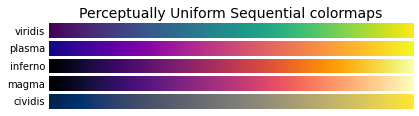

In [3]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis'])]:
    plot_color_gradients(cmap_category, cmap_list)


In [96]:
g_dens = 20


def f(x):
    out = 0
    s = 1
    for i in range(int(100*g_dens)):
        out +=  1.5 *np.exp(-np.random.rand()* ((x - i)/s)**2)


    return out

x = np.linspace(0,20,200)
out = f(x)

In [107]:
xsam = x[np.arange(0,200, 15)]; ysam = out[np.arange(0,200, 15)]
fit = np.poly1d(np.polyfit(xsam, ysam, 12))


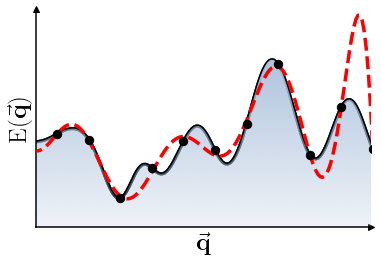

In [159]:
fig, axs = plt.subplots()
axs.plot(x, out, color='k')
gradient_fill(x, out, ax=axs, fill_color='lightsteelblue')
axs.scatter(xsam, ysam, color='k', s=70, zorder=10)
axs.plot(x, out, color='k')
axs.plot(x, fit(x), color='red', linestyle='--', zorder=5, linewidth=3.5)
# axs.fill_between(x,out, cmap=mpl.cm.plasma)
axs.set(xticks=[], yticks=[], xlabel=r'$\vec{\mathbf{q}}$', ylabel=r'$\mathrm{E} ( \vec{ \mathbf{q}} )$',
        xlim=[2,18], ylim=[4,7.4])
#axs.spines["left"].set_position(("data", 0))
#axs.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.plot(1, 4, ">k", transform=axs.get_yaxis_transform(), clip_on=False)
axs.plot(2, 1, "^k", transform=axs.get_xaxis_transform(), clip_on=False)
# axs.set(xticks=[], yticks=[], xlabel=r'$Q$', ylabel=r'$H$',
#         xlim=[2,18], ylim=[4,7])
fig.savefig('/home/joe/Documents/MoS/infographic/fit.pdf', bbox_inches='tight')

In [63]:
np.arange(0,20,20)


array([0])

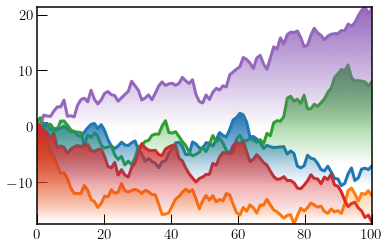

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
np.random.seed(1977)

def main():
    for _ in range(5):
        gradient_fill(*generate_data(100))
    plt.show()

def generate_data(num):
    x = np.linspace(0, 100, num)
    y = np.random.normal(0, 1, num).cumsum()
    return x, y

def gradient_fill(x, y, fill_color=None, ax=None, **kwargs):
    """
    Plot a line with a linear alpha gradient filled beneath it.

    Parameters
    ----------
    x, y : array-like
        The data values of the line.
    fill_color : a matplotlib color specifier (string, tuple) or None
        The color for the fill. If None, the color of the line will be used.
    ax : a matplotlib Axes instance
        The axes to plot on. If None, the current pyplot axes will be used.
    Additional arguments are passed on to matplotlib's ``plot`` function.

    Returns
    -------
    line : a Line2D instance
        The line plotted.
    im : an AxesImage instance
        The transparent gradient clipped to just the area beneath the curve.
    """
    if ax is None:
        ax = plt.gca()

    line, = ax.plot(x, y, **kwargs)
    if fill_color is None:
        fill_color = line.get_color()

    zorder = line.get_zorder()
    alpha = line.get_alpha()
    alpha = 1.0 if alpha is None else alpha

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

    ax.autoscale(True)
    return line, im

main()

In [160]:
from ase.build import nanotube


In [163]:
nan = nanotube(3, 6)

In [167]:
with open('cnt.xyz', 'w') as f:
    write_xyz(f, nan)

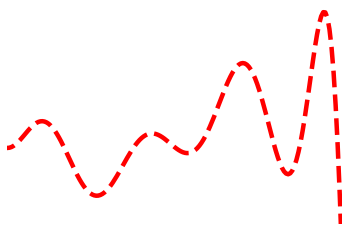

In [182]:
fig, axs = plt.subplots()
# axs.plot(x, out, color='k')
# gradient_fill(x, out, ax=axs, fill_color='lightsteelblue')
# axs.scatter(xsam, ysam, color='k', s=70, zorder=10)
# axs.plot(x, out, color='k')
axs.plot(x, fit(x), color='red', linestyle='--', zorder=5, linewidth=4.5)
# axs.fill_between(x,out, cmap=mpl.cm.plasma)
axs.set(xticks=[], yticks=[],
        xlim=[2,18.3], ylim=[4,7.4])
#axs.spines["left"].set_position(("data", 0))
#axs.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.spines["left"].set_visible(False)
axs.spines["bottom"].set_visible(False)
# axs.plot(1, 4, ">k", transform=axs.get_yaxis_transform(), clip_on=False)
# axs.plot(2, 1, "^k", transform=axs.get_xaxis_transform(), clip_on=False)
fig.savefig('/home/joe/Documents/MoS/infographic/fit_squiggle.pdf', bbox_inches='tight')